In [8]:
import numpy as np 
import pandas as pd

In [9]:
df = pd.read_csv(r'C:\Users\Sejal Hanmante\OneDrive\Documents\GitHub\ForEx\all_data.csv')
df.head()

,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair
0,2014-11-07,61.390,61.620,61.340,61.400,USD/INR
1,2014-11-10,61.500,61.635,61.340,61.495,USD/INR
2,2014-11-11,61.530,61.555,61.505,61.508,USD/INR
3,2014-11-12,61.508,61.560,61.350,61.391,USD/INR
4,2014-11-13,61.368,61.623,61.350,61.565,USD/INR


In [10]:
usd_inr = df.loc[df['Currency Pair']=='USD/INR']
usd_inr

,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair
0,2014-11-07,61.390,61.620,61.340,61.4000,USD/INR
1,2014-11-10,61.500,61.635,61.340,61.4950,USD/INR
2,2014-11-11,61.530,61.555,61.505,61.5080,USD/INR
3,2014-11-12,61.508,61.560,61.350,61.3910,USD/INR
4,2014-11-13,61.368,61.623,61.350,61.5650,USD/INR
...,...,...,...,...,...,...
2598,2024-10-24,84.045,84.080,84.017,84.0640,USD/INR
2599,2024-10-25,84.067,84.080,84.021,84.0750,USD/INR
2600,2024-10-28,84.062,84.080,84.016,84.0400,USD/INR
2601,2024-10-29,84.045,84.080,83.996,84.0380,USD/INR


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [12]:
import plotly.express as px
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Closing_price'):
    fig = px.line(df, x=x, y=y, title=title, labels={x: xlabel, y: ylabel}, 
                  line_shape='linear', markers=True)
    fig.update_layout(title=title, xaxis_title=xlabel, yaxis_title=ylabel)
    fig.show() 

a = usd_inr[["Date","Closing_price"]]
plot_df(a, x='Date', y="Closing_price", title=f'Open Price for last 10 years for the currency pair ')


In [13]:
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
!pip install pmdarima
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio

C:\Users\Sejal Hanmante\AppData\Local\Temp\ipykernel_5312\3103028010.py:5: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



<Figure size 640x480 with 0 Axes>

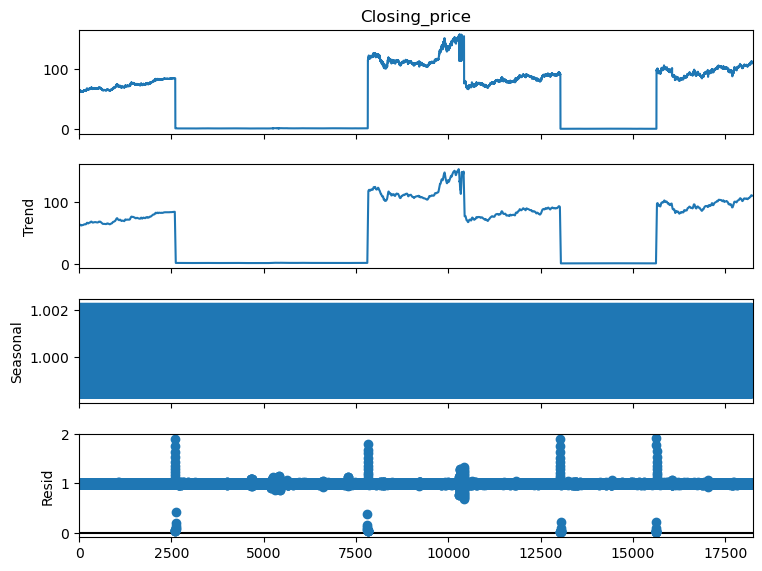

In [15]:
result = seasonal_decompose(df["Closing_price"], model='multiplicative', period=24)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(8, 6)
fig.show()

In [ ]:
model = auto_arima(usd_inr['Closing_price'], seasonal=True, m=52, suppress_warnings=True)
print(model.order) # to find values of p , d , q 

In [ ]:
## SARIMA 
from statsmodels.tools.sm_exceptions import  ValueWarning
warnings.simplefilter('ignore', ValueWarning)

p, d, q = 2, 1, 0
model = SARIMAX(usd_inr["Closing_price"], order=(p, d, q),
                seasonal_order=(p, d, q, 52))
fitted = model.fit()
print(fitted.summary())

In [ ]:
predictions = fitted.predict(len(usd_inr), len(usd_inr)+90)
print(predictions)

In [ ]:
fig = go.Figure()

# Add training data line plot
fig.add_trace(go.Scatter(
    x=usd_inr.index,
    y=usd_inr['Close'],
    mode='lines',
    name='Training Data',
    line=dict(color='blue')
))

# Add predictions line plot
fig.add_trace(go.Scatter(
    x=predictions.index,
    y=predictions,
    mode='lines',
    name='Predictions',
    line=dict(color='red')
))

fig.update_layout(
    title="Training Data VS Predictions",
    xaxis_title="Date",
    yaxis_title="Close",
    legend_title="Data",
    width=1000,
    height=600
)

pio.show(fig)